In [1]:
%matplotlib inline

import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=14)

## 1-dimensional Fourier Transforms

Let's take $f(t) = e^{-|t|}$, then the Fourier transform is
$$
\mathcal{F}_t[f(t)](\nu) = F(\nu) = \frac{2}{1 + (2\pi\nu)^2}
$$

This function is well-behaved - it is continuous unlike $f(t) = 1/|t|$.

Also, it is asymptotically approaches zero as $|t| \to \infty$, which means that we can approximate it as a time-limited signal (almost all the power lies in some $|t| < C$ for some finite $C$.

In [2]:
def f(t):
    return np.exp(-np.abs(t))

def fourier_prediction(v):
    return 2 / (1 + (2*np.pi*v)**2)

def slow_fourier_transform(fn, t, v):
    dt = t[1] - t[0]
    return (fn(t)[:, None] * np.exp(-2j * np.pi * t[:, None] * v)).sum(0) * dt

N = 2**18
t = np.linspace(-100, 100, N, endpoint=False)

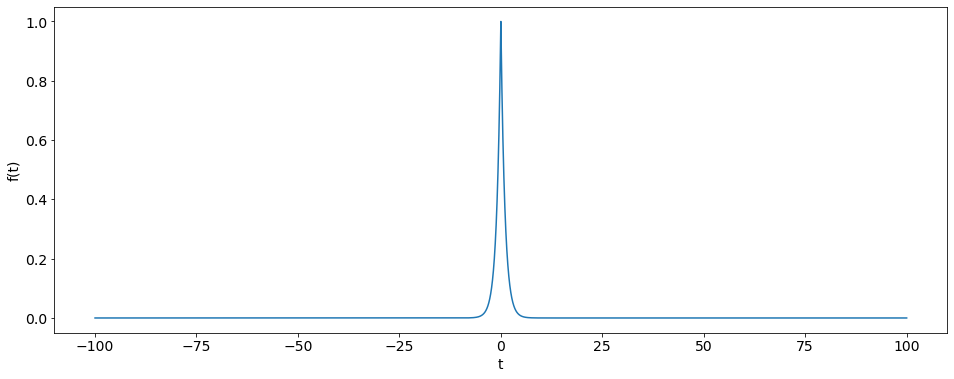

In [3]:
plt.figure('f(x)', figsize=(16, 6))
plt.plot(t, f(t), '-')
plt.xlabel("t")
plt.ylabel("f(t)")
plt.show()

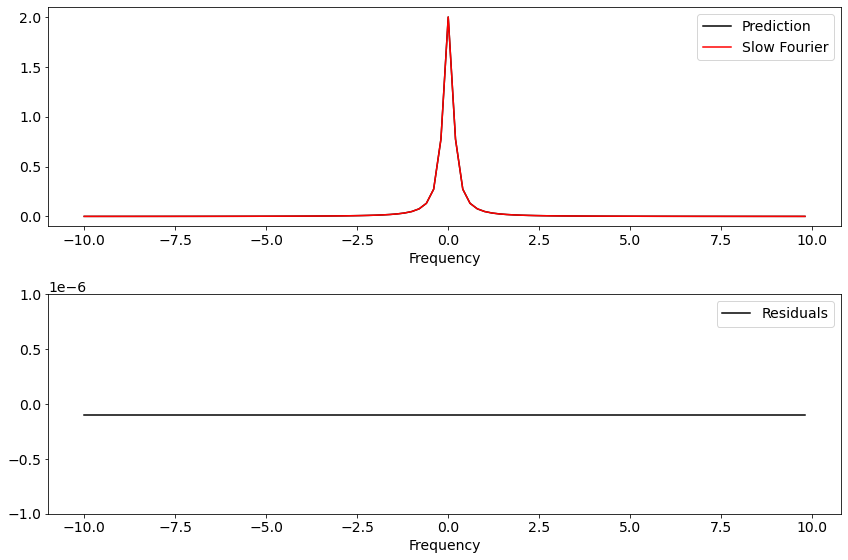

In [4]:
v = np.linspace(-10, 10, 100, endpoint=False)
preds = fourier_prediction(v)
slow_ft = slow_fourier_transform(f, t, v).real

plt.close('fourier')
plt.figure('fourier', figsize=(12, 8), tight_layout=True)
plt.subplot(211)
plt.plot(v, preds, 'k-', label='Prediction')
plt.plot(v, slow_ft, 'r-', label='Slow Fourier')
plt.xlabel("Frequency")
plt.legend()
ax = plt.subplot(212)
plt.plot(v, preds - slow_ft, 'k-', label='Residuals')
plt.ylim(-0.000001, 0.000001)
plt.xlabel("Frequency")
plt.legend()
plt.show()

There's clearly a non-zero residual, which is probably because we take the Fourier Transform over a finite domain.